<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cuauhtémoc Corrales Camacho y Berlín Isabel Preciado Escalera.

**Fecha:** 23 de noviembre del 2021.

**Expedientes** : 720482 , 723259.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/CuauhtemocCC/ProyectoConjunto_CCORRALES_BIPRECIADO

# Tarea 8
    

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento

## Ejercicio: 


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

In [4]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Código de solución Cuauhtémoc Corrales

## Extraccion de datos y calculos iniciales

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

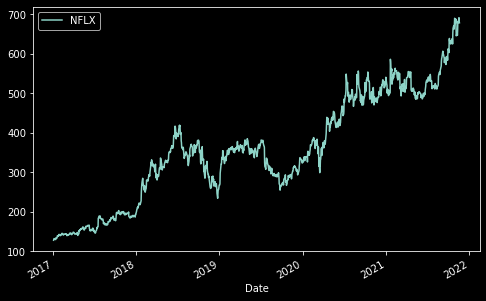

In [7]:
# Grafica de los precios de cierre de Netflix
plt.style.use(['dark_background'])

ticker = ['NFLX']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [8]:
# Ultimo precio de cierre de la accion
closes_aapl.iloc[-1]

Symbols
NFLX    678.8
Name: 2021-11-19 00:00:00, dtype: float64

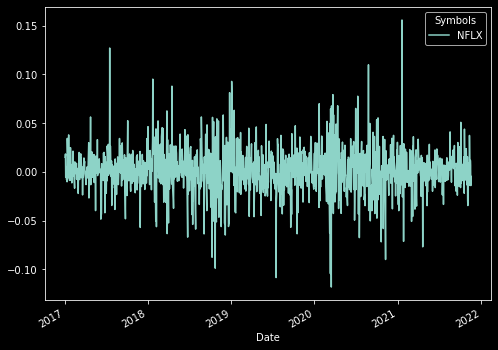

In [10]:
# Grafica de los rendimientos de Netflix
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [17]:
# Asignacion de las fechas a simular, se usaron 90 dias y 10000 escenarios posibles.

from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-03-25'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
                '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
                '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
                '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13',
                '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
                '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
                '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
                '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10',
                '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
                '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
                '2022-01-21', '2022-01-24', '2022-01-25', '2022-01-26',
                '2022-01-27', '2022-01-28', '2022-01-31', '2022-02-01',
                '2022-02-02', '2022-02-03', '2022-02-04', '2022-

**Calculo de rendimientos simples y su simulacion de precios**

In [19]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,NFLX
Date,
2017-01-04,1.506e-02
2017-01-05,1.855e-02
2017-01-06,-5.614e-03
2017-01-09,-9.156e-04
2017-01-10,-8.095e-03


In [25]:
# Simulacion de precios por rendmientos simples
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.head()

,0,1,2,...,9997,9998,9999
2021-11-22,687.581,716.986,686.007,...,681.606,666.379,641.432
2021-11-23,702.477,717.018,680.780,...,685.664,668.456,658.571
2021-11-24,692.143,718.850,690.246,...,685.209,680.579,640.216
2021-11-25,691.510,720.743,692.976,...,668.930,698.479,628.061
2021-11-26,693.462,729.521,695.542,...,649.763,704.658,624.656


**Calculo de rendimientos logaritmicos y su simulacion de precios**

In [29]:
# Calculo de rendimientos logaritmicos
ri = calc_daily_ret(closes_aapl)
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulacion a partir de los rendimientos logaritmicos
sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())
S_T2.head()

,0,1,2,...,9997,9998,9999
2021-11-22,687.408,717.721,685.822,...,681.407,666.349,642.394
2021-11-23,702.205,717.548,680.442,...,685.265,668.231,659.535
2021-11-24,691.792,719.173,689.736,...,684.616,680.218,641.292
2021-11-25,690.965,720.856,692.262,...,668.413,698.077,629.098
2021-11-26,692.713,729.447,694.621,...,649.419,704.056,625.531


## Calculo de la prima de la opcion PUT a partir del modelo de B&S

Segun los datos de investing.com, el valor de la prima de la opcion PUT con un precio strike de 670 es de 46. A partir de amabas simulaciones, veremos si nos acercamos a dicho valor. La fecha de vencimiento debe ser en marzo de 2022 Se considera que:
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

Prima    121.218
Name: 2022-03-25 00:00:00, dtype: float64

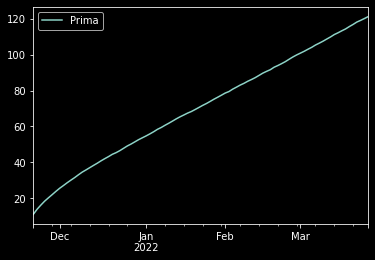

In [38]:
# Simulacion mediante rendimientos simples
strike = 670
put_s = pd.DataFrame({'Prima':np.exp(-mu_R*ndays) \
              *np.fmax(0, S_T-strike).mean(axis=1)}, index=dates)
put_s.plot();
put_s.iloc[-1]

Prima    124.264
Name: 2022-03-25 00:00:00, dtype: float64

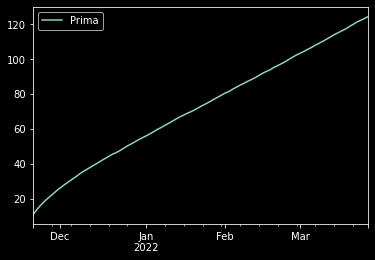

In [39]:
# Simulacion mediante rendimientos logaritmicos
strike = 670
put_l = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(0, S_T2-strike).mean(axis=1)}, index=dates)
put_l.plot();
put_l.iloc[-1]

# Código de solución Berlín I. Preciado